In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
data = datasets.load_wine()

In [2]:
data 

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['wine_class'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df['wine_class'] = df['wine_class'].replace(to_replace=[0,1,2], value=['class_0', 'class_1', 'class_2'])

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


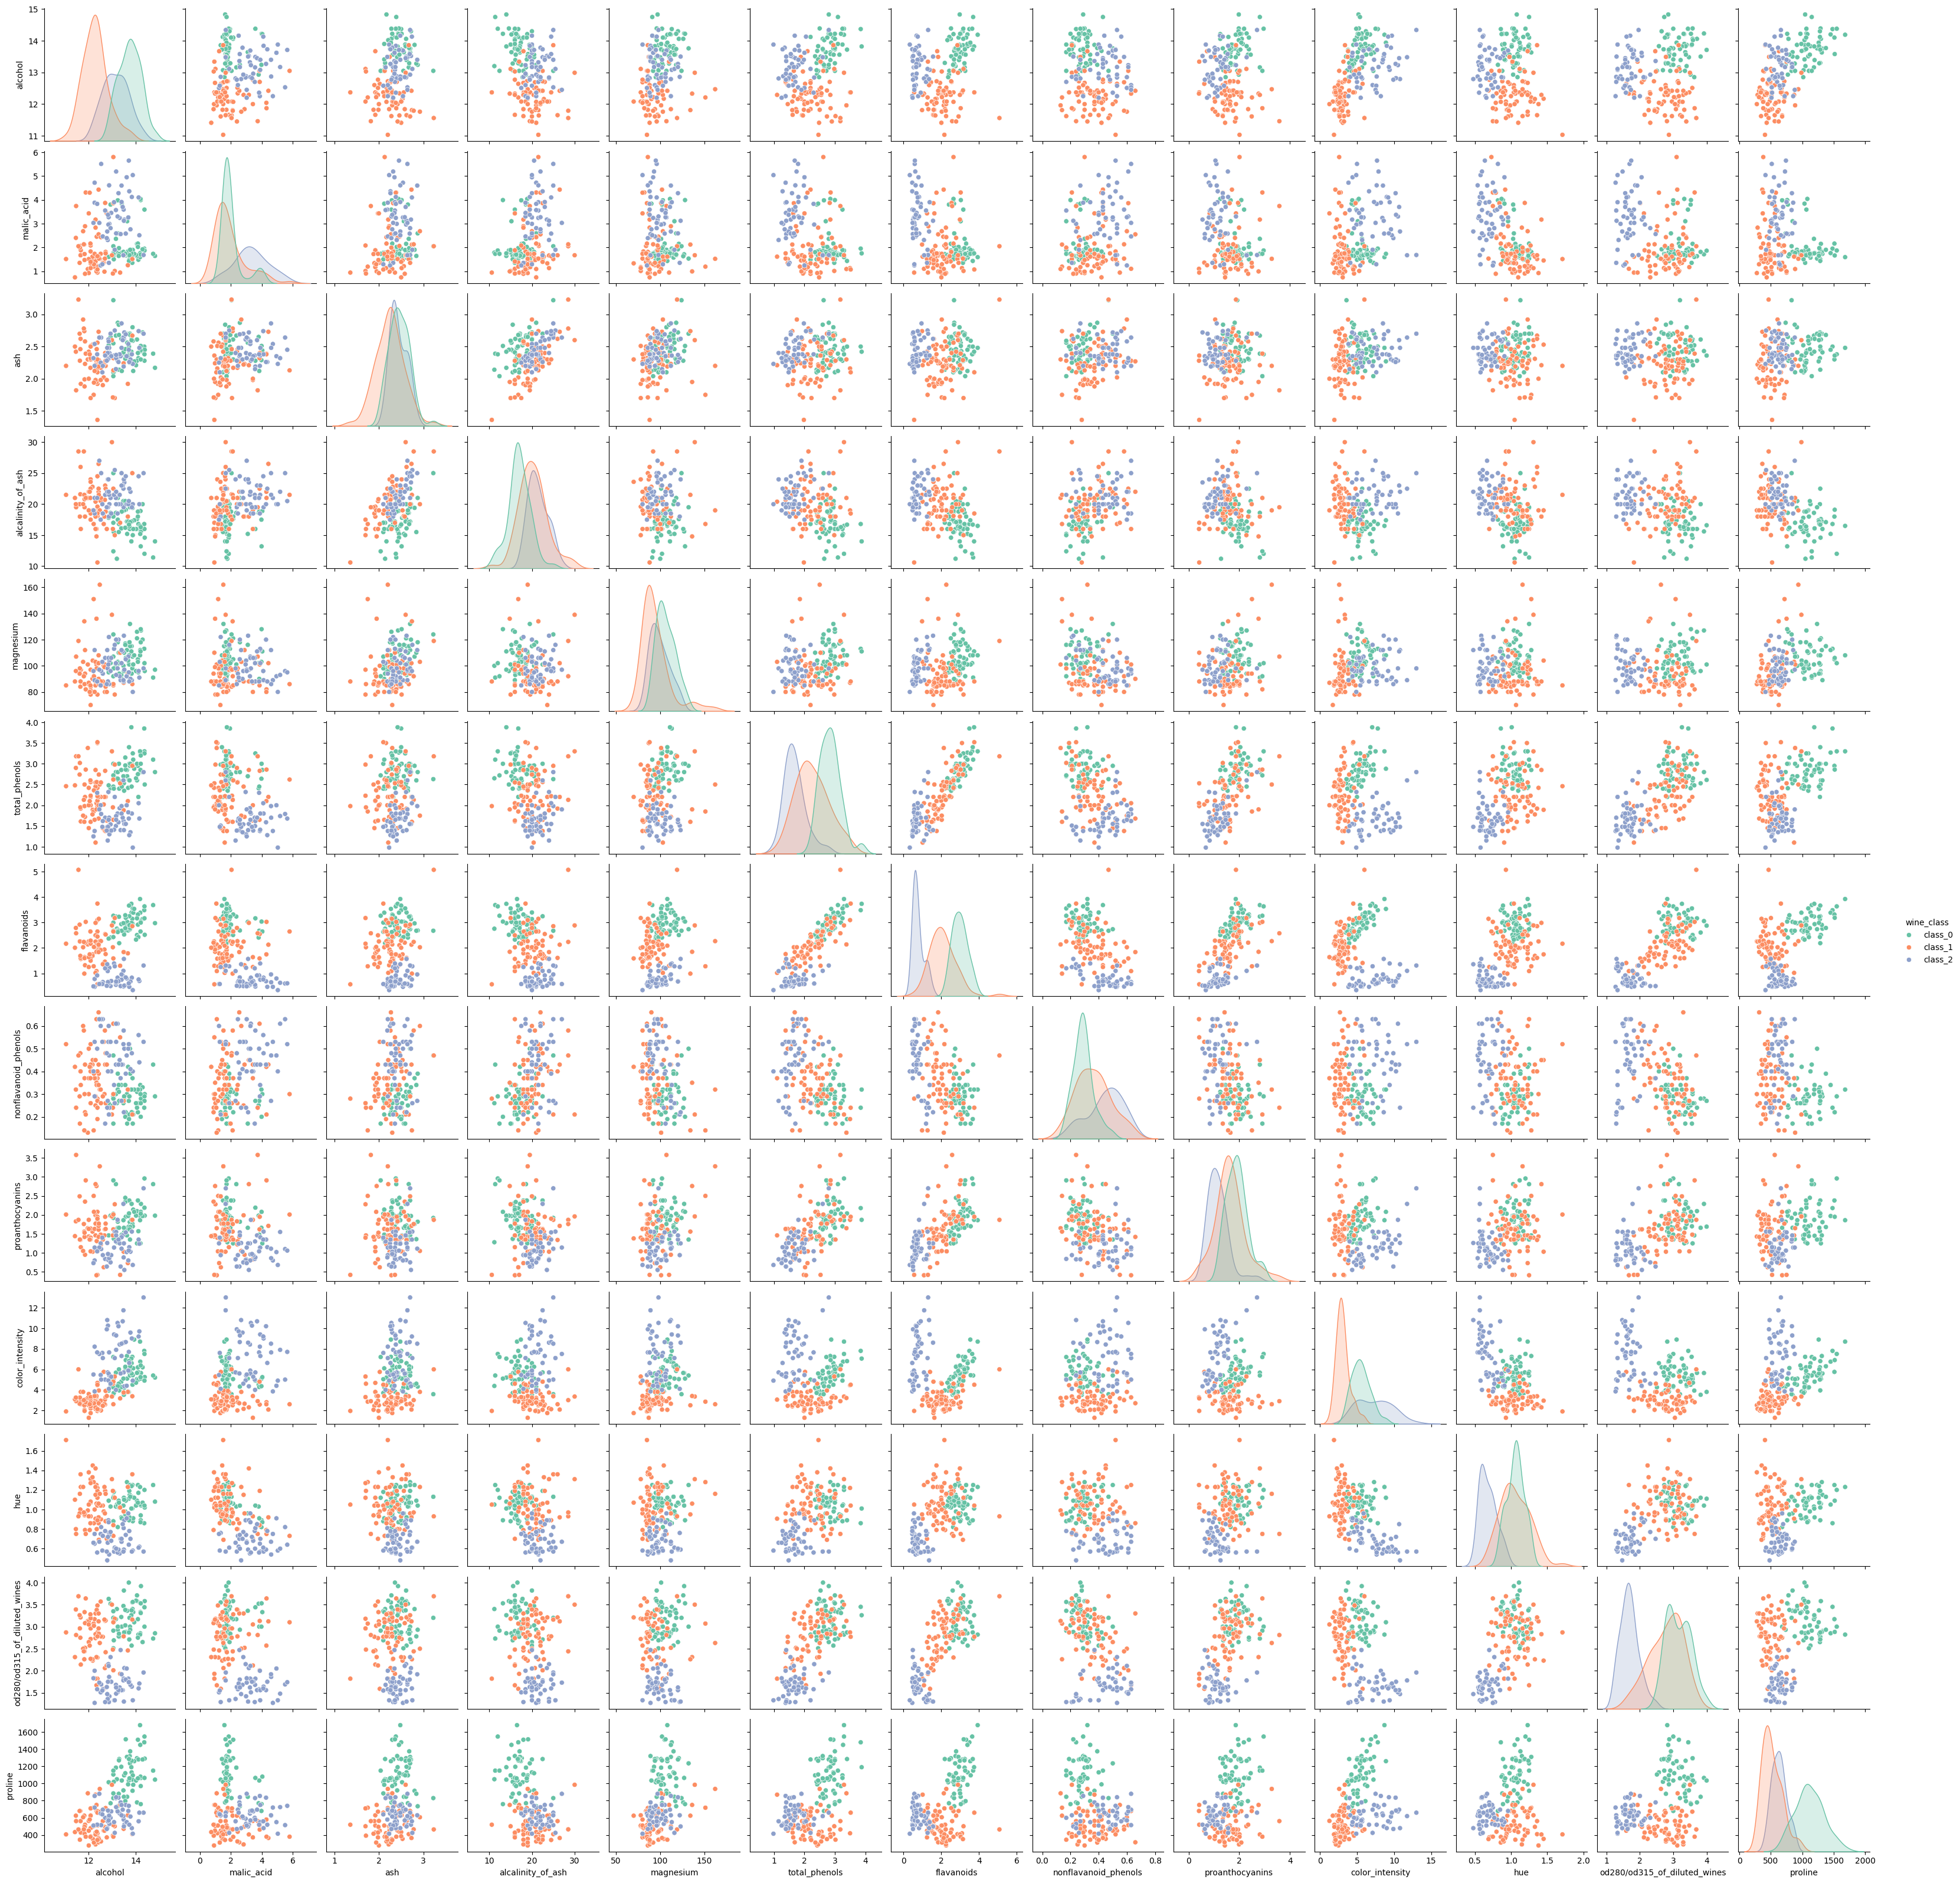

In [7]:
sns.pairplot(df, hue='wine_class', palette='Set2')

similar wine classes cluster together.. so knn is a feasible option 

In [8]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine_class                      0
dtype: int64

In [9]:
X = df.drop('wine_class', axis=1)
y = df['wine_class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# k = sqrt(len of total training data sample)
k = int(np.sqrt(len(X_train)))
k

11

In [12]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",11
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [13]:
y_pred = knn.predict(X_test)
y_pred

array(['class_0', 'class_0', 'class_2', 'class_0', 'class_1', 'class_0',
       'class_2', 'class_0', 'class_2', 'class_0', 'class_0', 'class_2',
       'class_0', 'class_1', 'class_0', 'class_1', 'class_1', 'class_2',
       'class_0', 'class_1', 'class_0', 'class_1', 'class_2', 'class_2',
       'class_1', 'class_2', 'class_1', 'class_2', 'class_1', 'class_0',
       'class_0', 'class_1', 'class_0', 'class_0', 'class_0', 'class_0'],
      dtype=object)

In [14]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

,Actual,Predicted
19,class_0,class_0
45,class_0,class_0
140,class_2,class_2
30,class_0,class_0
67,class_1,class_1
16,class_0,class_0
119,class_1,class_2
174,class_2,class_0
109,class_1,class_2
141,class_2,class_0


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     class_0       0.82      1.00      0.90        14
     class_1       0.90      0.64      0.75        14
     class_2       0.44      0.50      0.47         8

    accuracy                           0.75        36
   macro avg       0.72      0.71      0.71        36
weighted avg       0.77      0.75      0.75        36

[[14  0  0]
 [ 0  9  5]
 [ 3  1  4]]


- precision: how correct positive predictions are. precision = tp/tp+fp
- recall: how many real postives we caught 
- f1 score: harmonic mean of precision and recall.
- support: Number of actual samples of each class.

In [ ]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
# accuracy--> 75%, we can improve it by scaling the data. 

Accuracy Score: 0.75


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
knn1 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn1.fit(X_train, y_train)
pred_new = knn1.predict(X_test)
print('Accuracy Score after scaling:', metrics.accuracy_score(y_test, pred_new))

# accuracy improved after scaling the data.

Accuracy Score after scaling: 0.9444444444444444


In [23]:
# grid search cv to find the best k value and metric for knn model.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']}
knn2 = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn2, param_grid=param_grid, cv=5, scoring = 'accuracy')
grid.fit(X_train, y_train)
print('Best Parameters:', grid.best_params_)
print('Best cross validation Score:', grid.best_score_)
y_pred_grid = grid.predict(X_test)
print('Accuracy Score after Grid Search CV:', metrics.accuracy_score(y_test, y_pred_grid))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross validation Score: 0.9785714285714286
Accuracy Score after Grid Search CV: 0.9444444444444444


In [ ]:
confusion_matrix(y_test, y_pred_grid) 

array([[14,  0,  0],
       [ 1, 12,  1],
       [ 0,  0,  8]])

In [26]:
import pickle
with open("wine_model.pkl", "wb") as f:
    pickle.dump(grid, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)